# Raport z projektu MCMC - MAT4

### Kod wykorzystany do rozwiązania zadań:

In [1]:
# Requirements:
# numpy~=1.22.0
# matplotlib~=3.5.1
# networkx~=2.6.3

import itertools
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from math import *
from tqdm import tqdm


def check_if_valid_coloring(g, kcoloring):
    for pair in itertools.combinations(range(len(g)), 2):
        if (g[pair[0]][pair[1]] == 1) and (kcoloring[pair[0]] == kcoloring[pair[1]]):
            return False

    return True


def generate_random_graph(
    nodes, edge_probability=0.3, must_be_connected=True, must_be_planar=False
):
    g = nx.erdos_renyi_graph(nodes, edge_probability)
    if must_be_connected and not must_be_planar:
        while not nx.is_connected(g):
            g = nx.erdos_renyi_graph(nodes, edge_probability)
    elif not must_be_connected and must_be_planar:
        while not nx.algorithms.check_planarity(g, counterexample=False)[0]:
            g = nx.erdos_renyi_graph(nodes, edge_probability)
    elif must_be_connected and must_be_planar:
        while (
            not nx.is_connected(g)
            or not nx.algorithms.check_planarity(g, counterexample=False)[0]
        ):
            g = nx.erdos_renyi_graph(nodes, edge_probability)
    return g


def draw_graph(graph, title, coloring=None):
    if nx.algorithms.check_planarity(graph, counterexample=False)[0]:
        nx.draw_planar(graph, node_color=coloring, with_labels=True)
    else:
        nx.draw_spring(graph, node_color=coloring, with_labels=True)
    plt.title(title, x=0.5, y=0.95, fontsize=10)
    plt.show()


# this method returns a list of k different random colors
def random_colors(k):
    colors = set()
    while len(colors) < k:
        colors.add(random.randint(0, 255 ** 3))
    return list(colors)


# Zadanie 1
def z1(g):
    i = 1

    node_colors = [random.choice(colors) for _ in range(len(g))]

    while check_if_valid_coloring(g, node_colors) == False:
        node_colors = [random.choice(colors) for _ in range(len(g))]

    return node_colors


# Zadanie 2
def z2(g, x0):
    last_valid_coloring = x0

    node_colors = x0
    for n in range(30_000):
        node_colors[random.randint(0, len(node_colors) - 1)] = random.choice(colors)
        if check_if_valid_coloring(g, node_colors):
            last_valid_coloring = node_colors.copy()

    return last_valid_coloring


# Zadanie 3
lam = 6


def T(i, j):
    if i == 0:
        if j == 0 or j == 1:
            return 1 / 2
        return 0
    if j == i - 1 or j == i + 1:
        return 1 / 2
    else:
        return 0


def pi(i):
    return exp(-lam) * (lam ** i) / factorial(i)


def a_function(i, j):
    if T(i, j) == T(j, i):
        return pi(j) / pi(i)
    res = pi(j) * T(j, i) / (pi(j) * T(i, j))
    return res


def print_a(n):
    for i in range(0, n):
        for j in range(0, n):
            print(i, j, a_function(i, j))


def what_prob(i, j):
    if i < 0 or j < 0:
        return 0
    if j == i and i > 0:
        res = 0
        if a_function(i, i - 1) < 1:
            res += 1 - a_function(i, i - 1)
        if a_function(i, i + 1) < 1:
            res += 1 - a_function(i, i + 1)
        return res / 2
    if T(i, j) == 0:
        return 0
    aij = a_function(i, j)
    if aij >= 1:
        return 1 / 2
    return aij / 2


def print_prob(n):
    for i in range(0, n):
        for j in range(0, n):
            print(i, j, what_prob(i, j))


def run_chain(start, n):
    state = start
    for i in range(0, n):
        j_prev = what_prob(state, state - 1)
        j_same = what_prob(state, state)
        j_next = what_prob(state, state + 1)
        u = random.random()
        # print(u)
        if u < j_prev and state > 0:
            state = state - 1
        elif u < j_prev + j_same:
            state = state
        else:
            state = state + 1
    return state


def generate(number_of_intigers, length_of_chain):
    numbers = []
    for i in range(0, number_of_intigers):
        numbers.append(run_chain(0, length_of_chain))
    return numbers


def check(i, n, l):
    global lam
    lam = l

    y_points = np.random.poisson(lam, i)

    numbers = generate(i, n)
    maxx = 0
    for x in numbers:
        if x > maxx:
            maxx = x
    for x in y_points:
        if x > maxx:
            maxx = x
    freq = [0] * (maxx + 1)
    x_points = []
    for x in range(0, maxx + 1):
        x_points.append(x)
    for x in numbers:
        freq[x] = freq[x] + 1

    freq_org = [0] * (maxx + 1)
    for x in y_points:
        freq_org[x] = freq_org[x] + 1

    plt.plot(x_points, freq, label="generwoane")
    plt.plot(x_points, freq_org, label="modelowane")
    plt.legend()
    plt.title("Wystąpienia liczb generowanych zestawione z modelowymi")
    plt.show()

    mean = sum(numbers) / i
    print("wartość oczekiwana: ", mean, " a lambda była: ", lam)

    print(
        "Różnica bezwzględna (do 2 miejsc po przecinku) wygenerowanej ilości wystąpień danej liczby z teoretyczną (pi(i)), oraz błąd względny, ogólnie generujemy ",
        i,
        "liczb",
    )
    for x in x_points:
        print(
            x,
            format(abs((pi(x) * i) - freq[x]), ".2f"),
            format(abs((pi(x) * i) - freq[x]) / (pi(x) * i), ".2f"),
        )

Wprowadź dane do zadań 1, 2:


Podaj liczbę wierzchołków grafu G:  11
Podaj liczbę kolorów:  3


Wprowadź dane do zadania 3:


Podaj ile liczb do wygenerować (sugerowane >=800):  1000
Podaj długość łańcucha Markowa (sugerowane >=1000):  1200
Podaj lambdę(sugerowane 6 taka jak do obliczeń wyżej):  6


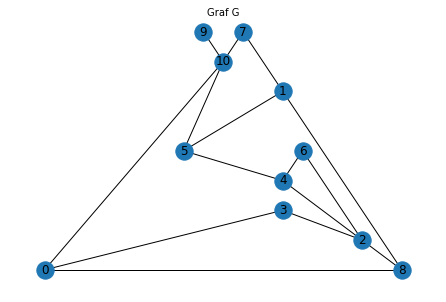

In [2]:
if __name__ == "__main__":

    print("Wprowadź dane do zadań 1, 2:")
    n = int(input("Podaj liczbę wierzchołków grafu G: "))
    k = int(input("Podaj liczbę kolorów: "))

    if n < 1 or k < 1:
        raise ValueError("Liczby n i k muszą być dodatnie")
        
    print("Wprowadź dane do zadania 3:")
    q = int(input("Podaj ile liczb do wygenerować (sugerowane >=800): "))
    r = int(input("Podaj długość łańcucha Markowa (sugerowane >=1000): "))
    s = int(input("Podaj lambdę(sugerowane 6 taka jak do obliczeń wyżej): "))


    # create graph with random edges
    graph = generate_random_graph(n)
    draw_graph(graph, "Graf G")

    # create adjacency matrix
    adj = nx.to_numpy_array(graph)

    # create k sized set of RGB colors
    colors = random_colors(k)

    z1coloring = z1(adj)

    z2coloring = z2(adj, z1coloring)

### Zadanie 1

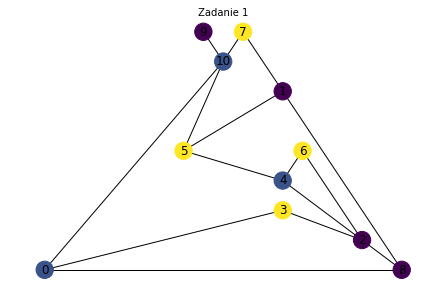

Wierzchołek 0 : 0x911673
Wierzchołek 1 : 0x77142f
Wierzchołek 2 : 0x77142f
Wierzchołek 3 : 0xdc7c2c
Wierzchołek 4 : 0x911673
Wierzchołek 5 : 0xdc7c2c
Wierzchołek 6 : 0xdc7c2c
Wierzchołek 7 : 0xdc7c2c
Wierzchołek 8 : 0x77142f
Wierzchołek 9 : 0x77142f
Wierzchołek 10 : 0x911673


In [3]:
draw_graph(graph, "Zadanie 1", z1coloring)
for index, color in enumerate(z1coloring):
    print("Wierzchołek", index, ":", hex(color), end="\n")

### Zadanie 2

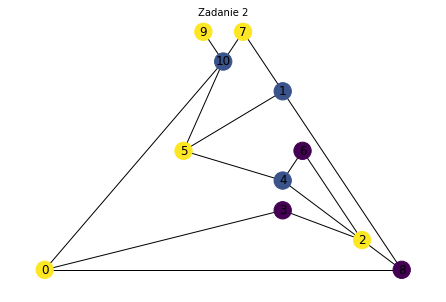

Wierzchołek 0 : 0xdc7c2c
Wierzchołek 1 : 0x911673
Wierzchołek 2 : 0xdc7c2c
Wierzchołek 3 : 0x77142f
Wierzchołek 4 : 0x911673
Wierzchołek 5 : 0xdc7c2c
Wierzchołek 6 : 0x77142f
Wierzchołek 7 : 0xdc7c2c
Wierzchołek 8 : 0x77142f
Wierzchołek 9 : 0xdc7c2c
Wierzchołek 10 : 0x911673


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [05:40<00:00,  8.81it/s]


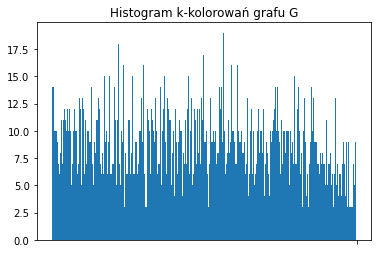

In [4]:
draw_graph(graph, "Zadanie 2", z2coloring)
for index, color in enumerate(z2coloring):
    print("Wierzchołek", index, ":", hex(color), end="\n")
    
z2colorings = list()

for i in tqdm(range(3000)):
    z2colorings.append("".join([str(x) for x in z2(adj, z1coloring)]))

plt.hist(z2colorings, bins=len(set(z2colorings)))
plt.xticks("")
plt.title("Histogram k-kolorowań grafu G")
plt.show()

### Zadanie 3

lambda = 6
i j a(i,j):
0 0 1.0
0 1 6.0
0 2 18.0
0 3 36.0
0 4 54.00000000000001
0 5 64.8
0 6 64.8
0 7 55.542857142857144
0 8 41.65714285714286
0 9 27.771428571428572
1 0 0.16666666666666666
1 1 1.0
1 2 3.0
1 3 6.0
1 4 9.0
1 5 10.8
1 6 10.8
1 7 9.257142857142858
1 8 6.942857142857143
1 9 4.628571428571429
2 0 0.05555555555555555
2 1 0.3333333333333333
2 2 1.0
2 3 2.0
2 4 3.0
2 5 3.6
2 6 3.6
2 7 3.085714285714286
2 8 2.314285714285714
2 9 1.542857142857143
3 0 0.027777777777777776
3 1 0.16666666666666666
3 2 0.5
3 3 1.0
3 4 1.5
3 5 1.8
3 6 1.8
3 7 1.542857142857143
3 8 1.157142857142857
3 9 0.7714285714285715
4 0 0.018518518518518517
4 1 0.1111111111111111
4 2 0.3333333333333333
4 3 0.6666666666666666
4 4 1.0
4 5 1.2
4 6 1.2
4 7 1.0285714285714285
4 8 0.7714285714285714
4 9 0.5142857142857142
5 0 0.015432098765432098
5 1 0.09259259259259259
5 2 0.2777777777777778
5 3 0.5555555555555556
5 4 0.8333333333333334
5 5 1.0
5 6 1.0
5 7 0.8571428571428572
5 8 0.6428571428571428
5 9 0.4285714285714

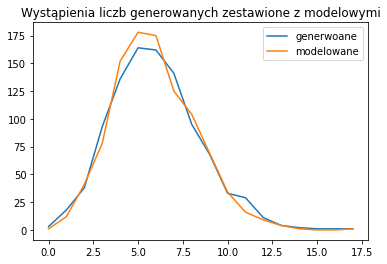

wartość oczekiwana:  5.977  a lambda była:  6
Różnica bezwzględna (do 2 miejsc po przecinku) wygenerowanej ilości wystąpień danej liczby z teoretyczną (pi(i)), oraz błąd względny, ogólnie generujemy  1000 liczb
0 0.52 0.21
1 3.13 0.21
2 6.62 0.15
3 3.76 0.04
4 2.15 0.02
5 3.38 0.02
6 1.38 0.01
7 3.32 0.02
8 8.26 0.08
9 0.84 0.01
10 8.30 0.20
11 6.47 0.29
12 0.26 0.02
13 1.20 0.23
14 0.23 0.10
15 0.11 0.12
16 0.67 1.99
17 0.88 7.48


In [5]:
print("lambda = 6")
print("i", "j", "a(i,j):")
print_a(10)
print("i", "j", "prawdopodobieństwo X_n+1 = j | X_n = i:")
print_prob(10)

check(q, r, s)